In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/bigdata/project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark 
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u282-b08-0ubuntu1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
# create the session
conf = SparkConf().set("spark.project", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
df = spark.read.csv('netflix_titles.txt',inferSchema =True, header=True,sep='\t')

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- show_id: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
df.show()

+---+--------+-------+--------------------+--------------------+--------------------+--------------------+----------+------------+--------+--------+--------------------+--------------------+
|_c0| show_id|   type|               title|            director|                cast|             country|date_added|release_year|  rating|duration|           listed_in|         description|
+---+--------+-------+--------------------+--------------------+--------------------+--------------------+----------+------------+--------+--------+--------------------+--------------------+
|  0|81145628|  Movie|Norm of the North...|Richard Finn, Tim...|Alan Marriott, An...|United States, In...|  9-Sep-19|        2019|   TV-PG|  90 min|Children & Family...|Before planning a...|
|  1|80117401|  Movie|Jandino: Whatever...|                null|    Jandino Asporaat|      United Kingdom|  9-Sep-16|        2016|   TV-MA|  94 min|     Stand-Up Comedy|"Jandino Asporaat...|
|  2|70234439|TV Show|  Transformers Prime|  

In [ ]:
from pyspark.sql.functions import filter,desc
df.filter("type == 'Movie'").groupBy("listed_in").count().sort(desc("count")).show()

+--------------------+-----+
|           listed_in|count|
+--------------------+-----+
|       Documentaries|  299|
|     Stand-Up Comedy|  273|
|Dramas, Internati...|  248|
|Dramas, Independe...|  186|
|Comedies, Dramas,...|  174|
|Documentaries, In...|  150|
|Children & Family...|  129|
|Children & Family...|  120|
|Comedies, Interna...|  120|
|Dramas, Internati...|  108|
|Action & Adventur...|  103|
|Comedies, Interna...|   97|
|Dramas, Internati...|   93|
|              Dramas|   89|
|Comedies, Dramas,...|   77|
|Action & Adventur...|   75|
|            Comedies|   73|
|Dramas, Independe...|   68|
|  Action & Adventure|   68|
|Action & Adventur...|   57|
+--------------------+-----+
only showing top 20 rows



In [ ]:
a=df.filter("type == 'Movie'").groupBy("listed_in").count().sort(desc("count")).limit(10).toPandas()
a.head()

,listed_in,count
0,Documentaries,299
1,Stand-Up Comedy,273
2,"Dramas, International Movies",248
3,"Dramas, Independent Movies, International Movies",186
4,"Comedies, Dramas, International Movies",174


In [ ]:
def plot_bar(x_var, y_var, df, num_colors, title_name, xlabel_name, ylabel_name, hue_col):
    if hue_col == None:
        plt.figure(figsize = (10,6))
        sns.barplot(x = x_var, y = y_var, data = df, ci = False,
                    palette = sns.dark_palette(color = '#b60c26', n_colors = num_colors, reverse = True, input = 'hsl'))
        plt.title(title_name, fontdict = {'fontsize': 16, 'fontweight': 'bold'})
        plt.xlabel(xlabel_name)
        plt.ylabel(ylabel_name)
        plt.show()
    else:
        plt.figure(figsize = (10,6))
        sns.barplot(x = x_var, y = y_var, data = df, ci = False, hue = hue_col,
                    palette = sns.dark_palette(color = '#b60c26', n_colors = num_colors, reverse = True, input = 'hsl'))
        plt.title(title_name, fontdict = {'fontsize': 16, 'fontweight': 'bold'})
        plt.xlabel(xlabel_name)
        plt.ylabel(ylabel_name)
        plt.show()

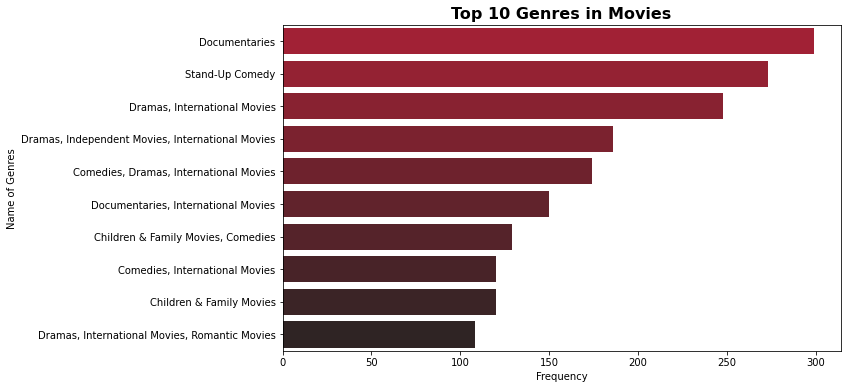

In [ ]:
import seaborn as sns
plot_bar(x_var = 'count',
         y_var = 'listed_in',
         df = a, 
         num_colors = 10, 
         title_name = 'Top 10 Genres in Movies', 
         xlabel_name = 'Frequency', 
         ylabel_name = 'Name of Genres',
         hue_col = None)

In [ ]:
b=df.filter("type == 'TV Show'").groupBy("listed_in").count().sort(desc("count")).limit(10).toPandas()
b.head()

,listed_in,count
0,Kids' TV,159
1,"International TV Shows, TV Dramas",92
2,"Crime TV Shows, International TV Shows, TV Dramas",92
3,"International TV Shows, Romantic TV Shows, TV ...",78
4,"Kids' TV, TV Comedies",75


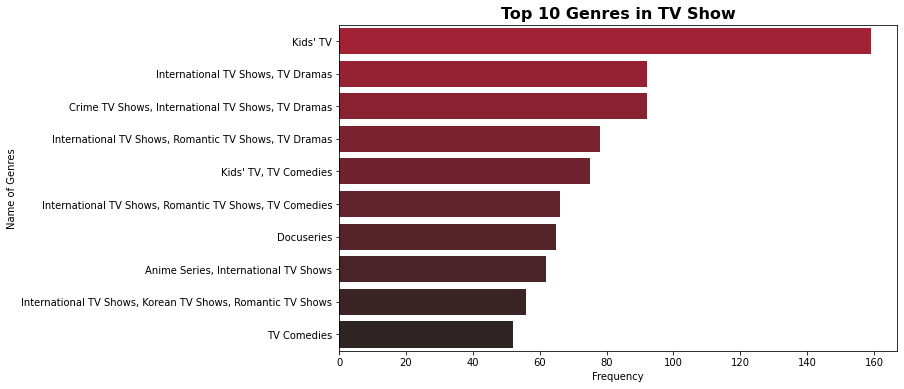

In [ ]:
plot_bar(x_var = 'count',
         y_var = 'listed_in',
         df = b, 
         num_colors = 10, 
         title_name = 'Top 10 Genres in TV Show', 
         xlabel_name = 'Frequency', 
         ylabel_name = 'Name of Genres',
         hue_col = None)

In [ ]:
c=df.toPandas()
c.head()

,_c0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,1,80117401,Movie,Jandino: Whatever it Takes,None,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,"""Jandino Asporaat riffs on the challenges of r..."
2,2,70234439,TV Show,Transformers Prime,None,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,3,80058654,TV Show,Transformers: Robots in Disguise,None,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


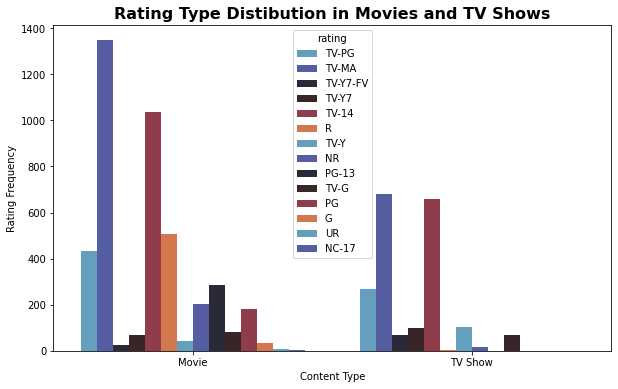

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'type', hue = 'rating', data = c, palette = sns.color_palette("icefire"))
plt.title('Rating Type Distribution in Movies and TV Shows', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Content Type')
plt.ylabel('Rating Frequency')
plt.show()

In [ ]:

df.groupBy("type",'release_year').count().sort(desc("count")).show()

+-------+------------+-----+
|   type|release_year|count|
+-------+------------+-----+
|  Movie|        2017|  682|
|  Movie|        2018|  646|
|  Movie|        2016|  593|
|TV Show|        2019|  443|
|TV Show|        2018|  417|
|  Movie|        2019|  400|
|  Movie|        2015|  363|
|TV Show|        2017|  277|
|TV Show|        2016|  237|
|  Movie|        2014|  213|
|  Movie|        2013|  177|
|TV Show|        2015|  154|
|  Movie|        2012|  125|
|  Movie|        2010|  111|
|  Movie|        2011|  100|
|  Movie|        2009|   87|
|  Movie|        2008|   87|
|TV Show|        2014|   75|
|  Movie|        2007|   60|
|TV Show|        2013|   60|
+-------+------------+-----+
only showing top 20 rows



In [ ]:
d=df.groupBy("type",'release_year').count().sort(desc("count")).toPandas()

In [ ]:
from pyspark.sql.types import IntegerType
d=df.groupBy("type",'release_year').count().sort(desc("count"))

d = d.withColumn("release_year",d.release_year.cast(IntegerType())).toPandas()
d


,type,release_year,count
0,Movie,2017,682
1,Movie,2018,646
2,Movie,2016,593
3,TV Show,2019,443
4,TV Show,2018,417
...,...,...,...
110,TV Show,1967,1
111,Movie,1947,1
112,TV Show,1968,1
113,Movie,1970,1


In [ ]:
d.release_year.min()

1925

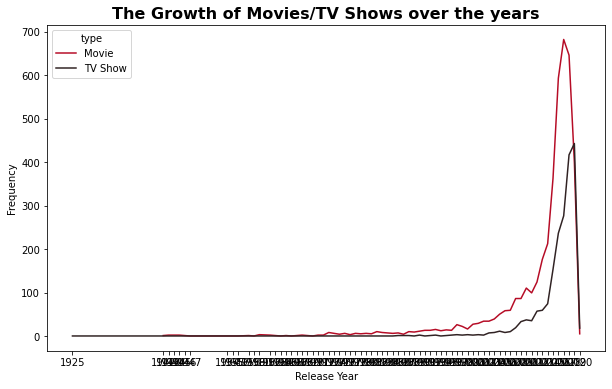

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'release_year', y = 'count', hue = 'type', data = d, 
             palette = sns.dark_palette(color = '#b60c26', n_colors = 2, reverse = True, input = 'hsl'))
plt.title('The Growth of Movies/TV Shows over the years', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Release Year')
plt.xticks(ticks = d['release_year'].unique())
plt.ylabel('Frequency')
plt.show()